In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
#Incorporated citipy to determine city based on coordinates(lat and long)
from citipy import citipy

In [145]:
# Define Output File (CSV)
output_file = "output_data/cities.csv"

In [146]:
# Range of latitudes and longitudes
range_of_lat = (-90, 90)
range_of_lng = (-180, 180)

In [147]:
#Create list for cities and lat/long
list_cities = []
lat_lngs = []
# Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify the nearest city for each lat, lng combination using loop.If the city is unique, then add it to a our cities list
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in list_cities:
        list_cities.append(city)

#Get the city count to confirm sufficient count
len(list_cities)

631

In [195]:
#Read the csv output file into data frame
df_cities = pd.read_csv("output_data/cities.csv", encoding="utf-8")
del df_cities['city_id']
## check if the dataframe has the right format
df_cities.head()


,city,Cloudiness,Humidity,Latitude,Max Temp,Wind Speed
0,longyearbyen,0,61,78.22,-12.28,2.42
1,mataura,81,92,-46.19,52.00,0.54
2,hami,0,75,42.80,8.67,2.53
3,ixtapa,100,91,20.70,75.00,1.01
4,butaritari,7,72,3.07,84.85,9.24


In [149]:
# OpenWeatherMap API Key
weather_api_key = api_keys.weather_api_key

# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
city_data = []
count_one = 0
set_one = 1

print("Data Retrieval Starting......")
print("-----------------------------")



for city in list_cities:
    city_url = url + "&q=" + city
   #print(city_url)
   #print(f"City {count_one} of Set {set_one} | {city}")
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_m_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"city":city,
                      "Latitude":city_lat,
                      "Longitude":city_lng,
                      "Max Temp":city_m_temp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_data.append(city)
        else:
            count_one += 1
            city_data.append(city)
        print(f"City {count_one} of Set {set_one} | {city}")
    except:
        print("city not found, skipping....")
        pass

# Indicate that Data Loading is complete 
print("Data Retrieval Complete  ")

Data Retrieval Starting......
-----------------------------
City 1 of Set 1 | rikitea
City 2 of Set 1 | klaksvik
City 3 of Set 1 | pilot butte
City 4 of Set 1 | mataura
City 5 of Set 1 | ostrovnoy
City 6 of Set 1 | pisco
City 7 of Set 1 | thompson
City 8 of Set 1 | kaitangata
City 9 of Set 1 | olafsvik
City 10 of Set 1 | batagay-alyta
City 11 of Set 1 | orlovskiy
City 12 of Set 1 | lagoa
City 13 of Set 1 | aripuana
City 14 of Set 1 | hermanus
City 15 of Set 1 | micheweni
City 16 of Set 1 | jamestown
City 17 of Set 1 | port alfred
City 18 of Set 1 | qaanaaq
City 19 of Set 1 | hasaki
City 20 of Set 1 | mahebourg
City 21 of Set 1 | victoria point
City 22 of Set 1 | puerto ayora
City 23 of Set 1 | mendi
City 24 of Set 1 | kapaa
City 25 of Set 1 | vila franca do campo
City 26 of Set 1 | comodoro rivadavia
City 27 of Set 1 | alugan
City 28 of Set 1 | luderitz
City 29 of Set 1 | khatanga
City 30 of Set 1 | dikson
City 31 of Set 1 | tuktoyaktuk
City 32 of Set 1 | victoria
City 33 of Set 1 | ba

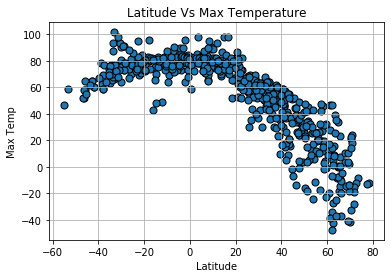

Plot shows an inverse correlation between latitude and temperature.
Lower latitudes have warmer temperatures and the higher latitudes have colder temperatures.


In [191]:
## Latitude Vs Max Temperature plot
#plt.scatter(city_df['Latitude'],city_df['Max Temp'],)
df_cities.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True,edgecolors="black",s=50, alpha=1)

# save the figure 
plt.savefig("output_plots/Max_Temp_vs_Latitude.png")

# Display the plot 
plt.show()

print( '\033[1m' + '\033[94m'+ 'Plot shows an inverse correlation between latitude and temperature.\nLower latitudes have warmer temperatures and the higher latitudes have colder temperatures.')

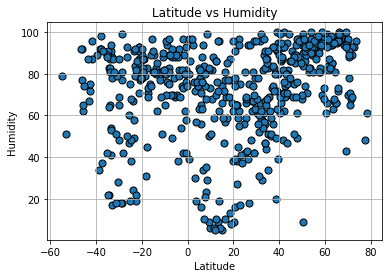

Humidity and latitude does not establish a strong correlation. So we can conclude that Humidity is not based on cities location in latitude


In [151]:
# latitude vs Humidity
df_cities.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = True,edgecolors="black",s=50, alpha=1)
# save the figure 
plt.savefig("output_plots/Humidity_vs_Latitude.png")
# Display the plot 
plt.show()
print('\033[1m'+ '\033[94m'+ 'Humidity and latitude does not establish a strong correlation. So we can conclude that Humidity is not based on cities location in latitude')

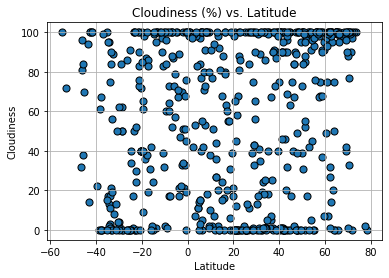

There is no trend or correlation that can be observed on Cloudiness and latitude.


In [152]:
# Cloudiness (%) vs. Latitude
df_cities.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = True,edgecolors="black",s=50, alpha=1)

# save the figure 
plt.savefig("output_plots/Cloudiness_vs_Latitude.png")

# Display the plot 
plt.show()

print ('\033[1m'+ '\033[94m'+ 'There is no trend or correlation that can be observed on Cloudiness and latitude.')

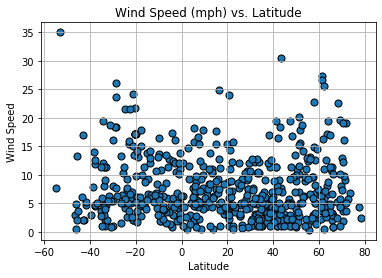

The plot indicates that latitude does not affect the wind speed. Though there are outliers, majority of samples does not really show strong correlation between latitude and wind speed


In [153]:
# Wind Speed (mph) vs. Latitude
df_cities.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = True,edgecolors="black",s=50, alpha=1) 

# Save the figure
plt.savefig("output_plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

print('\033[1m'+ '\033[94m'+ 'The plot indicates that latitude does not affect the wind speed. Though there are outliers, majority of samples does not really show strong correlation between latitude and wind speed')

In [154]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = df_cities.loc[df_cities["Latitude"]>0.01]
southern_hemisphere = df_cities.loc[df_cities["Latitude"]<-0.01]

northern_hemisphere.head()
#southern_hemisphere.head()

,city_id,city,Cloudiness,Humidity,Latitude,Max Temp,Wind Speed
0,0,longyearbyen,0,61,78.22,-12.28,2.42
2,2,hami,0,75,42.80,8.67,2.53
3,3,ixtapa,100,91,20.70,75.00,1.01
4,4,butaritari,7,72,3.07,84.85,9.24
7,7,yellowknife,100,84,62.46,5.00,11.01


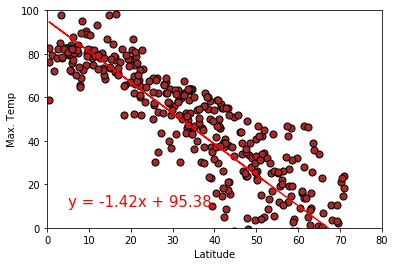

In [132]:
#Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c= "brown", edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/Temperature (F) vs. Latitude.png")

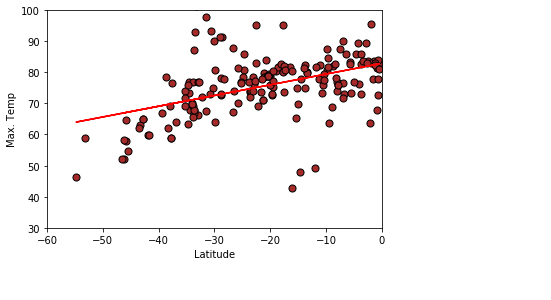

In [133]:
#Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='brown', edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/Southern_Temperature (F) vs. Latitude.png")

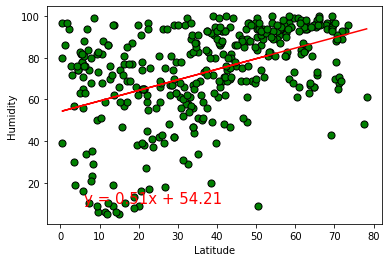

In [134]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='green', edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/Nort_Humidity (%) vs. Latitude.png")

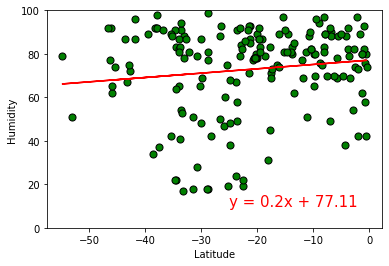

In [135]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='green', edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/South_Humidity (%) vs. Latitude.png")

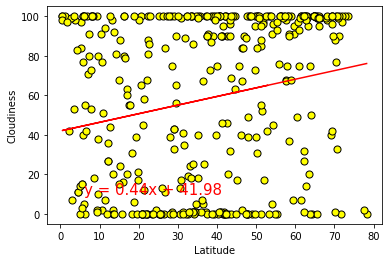

In [136]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='yellow', edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/Northern_Cloudiness_vs_Latitude.png")

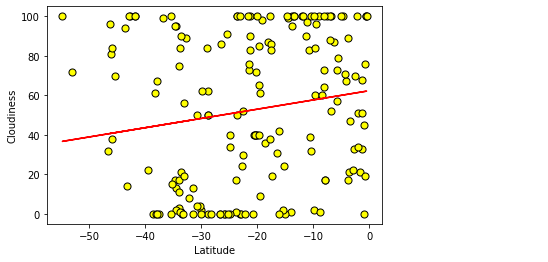

In [137]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='yellow', edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/Southern_Cloudiness_vs_Latitude.png")

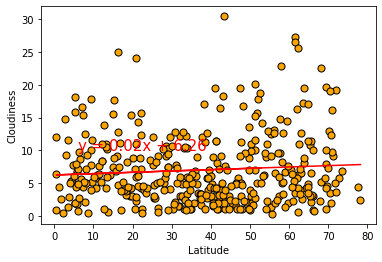

In [138]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='orange', edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/Northern_WSpeed_vs_Latitude.png")

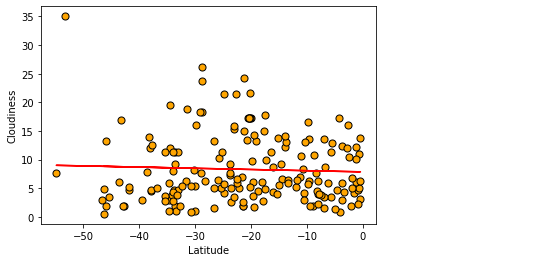

In [139]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='orange', edgecolors="black",s=50, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("output_plots/Southern_WSpeed_vs_Latitude.png")